<a href="https://colab.research.google.com/github/benitez-mjv/Research-and-Development/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDOS SOBRE A COVID-19

#### Colaboradores *'Coloque o seu nome na lista'*
- Leandro Benitez
- Renato Rodrigues
- Thiago Brito
- Wallace Marcelo
- Bruno Gurgel
- Diego Queiroz
- Thiago Lechuga



TO DO´s 

- Criar um dataframe sumarizado por data e estado
- Criar um join dos dataframes para poder plotar um mapa com as métricas
- Melhorar a visualização dos gráficos
- Criar visualização para acompanhar a 'cura' da COVID-19 (cenário menos pessimista)
- Que outras métricas podemos criar visando um cenário menos problema / mais solução (positivista)
- Tratar UF lat-long


DONE 
*'Mova as atividades do To Do para Done e coloque o seu nome como executor da atividade'*
- Organizar o gráfico já existente em ordem ascendente por data (Renato Rodrigues)
- Encontrar uma fonte de dados que tenha latitude e longitude


In [0]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Mapeando a fonte dos dados
url = 'https://raw.githubusercontent.com/belisards/coronabr/master/dados/corona_brasil.csv'

In [0]:
# Definindo o DataFrame
df = pd.read_csv(url, error_bad_lines=False)
df

,uid,date,time,suspects,refuses,confirmado,deads,local,cases,comments,broadcast,deaths,uf,Unnamed: 13,Unnamed: 14
0,11,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0,RO,NaN,NaN
1,12,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,0,AC,NaN,NaN
2,13,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,0,AM,NaN,NaN
3,14,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,0,RR,NaN,NaN
4,15,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0,PA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,33,2020-01-30,16:00,1.0,0.0,0.0,0.0,0,0,0,0,0,RJ,NaN,NaN
842,35,2020-01-30,16:00,3.0,1.0,0.0,0.0,0,0,0,0,0,SP,NaN,NaN
843,41,2020-01-30,16:00,1.0,1.0,0.0,0.0,0,0,0,0,0,PR,NaN,NaN
844,42,2020-01-30,16:00,0.0,2.0,0.0,0.0,0,0,0,0,0,SC,NaN,NaN


In [0]:
# Agrupando por Data e UF
df_group = df.groupby(['date','uf']).sum()
df_group

uid  suspects  refuses  confirmado  deads  cases  deaths
date       uf                                                          
2020-01-30 CE   23       1.0      0.0         0.0    0.0      0       0
           MG   31       1.0      0.0         0.0    0.0      0       0
           PR   41       1.0      1.0         0.0    0.0      0       0
           RJ   33       1.0      0.0         0.0    0.0      0       0
           RS   43       2.0      2.0         0.0    0.0      0       0
...            ...       ...      ...         ...    ...    ...     ...
2020-03-24 RS   43       0.0      0.0         0.0    0.0     98       0
           SC   42       0.0      0.0         0.0    0.0    107       0
           SE   28       0.0      0.0         0.0    0.0     15       0
           SP   35       0.0      0.0         0.0    0.0    810      40
           TO   17       0.0      0.0         0.0    0.0      7       0

[831 rows x 7 columns]

In [0]:
df = df.sort_values('date')
df

,uid,date,time,suspects,refuses,confirmado,deads,local,cases,comments,broadcast,deaths,uf,Unnamed: 13,Unnamed: 14
845,43,2020-01-30,16:00,2.0,2.0,0.0,0.0,0,0,0,0,0,RS,NaN,NaN
839,23,2020-01-30,16:00,1.0,0.0,0.0,0.0,0,0,0,0,0,CE,NaN,NaN
840,31,2020-01-30,16:00,1.0,0.0,0.0,0.0,0,0,0,0,0,MG,NaN,NaN
844,42,2020-01-30,16:00,0.0,2.0,0.0,0.0,0,0,0,0,0,SC,NaN,NaN
842,35,2020-01-30,16:00,3.0,1.0,0.0,0.0,0,0,0,0,0,SP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,51,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,0,MT,NaN,NaN
25,52,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,0,GO,NaN,NaN
26,53,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,0,DF,NaN,-
13,27,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,0,AL,NaN,NaN


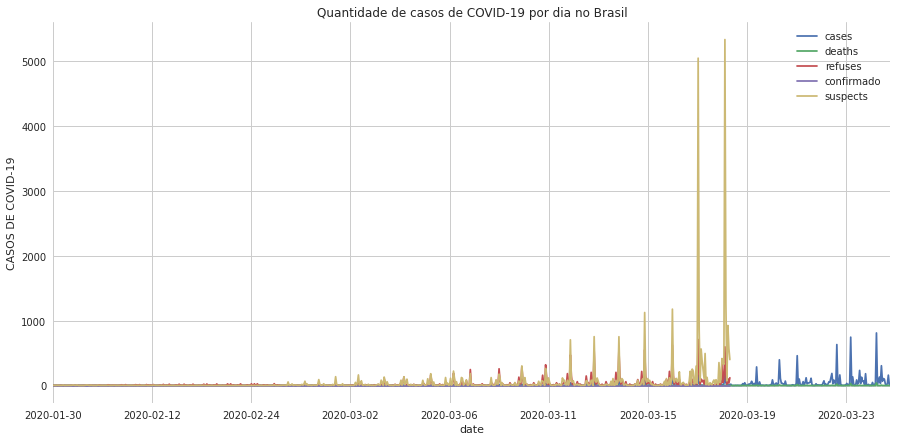

In [0]:
plt.style.use('seaborn')
sns.set_style("whitegrid")

# Configurando o tamanho do gráfico
plt.rcParams['figure.figsize'] = (15,7)

# Adicionando o título 
plt.title('Quantidade de casos de COVID-19 por dia no Brasil')

# Alterando nomes dos eixos
plt.xlabel('DATA')
plt.ylabel('CASOS DE COVID-19')

# Definindo Dados
ax = plt.gca()
df.plot(kind='line', x='date', y='cases', ax=ax)
df.plot(kind='line', x='date', y='deaths', ax=ax)
df.plot(kind='line', x='date', y='refuses', ax=ax)
df.plot(kind='line', x='date', y='confirmado', ax=ax)
df.plot(kind='line', x='date', y='suspects', ax=ax)


# Base de mapas

Base de mapas pode ser usada abaixo. lat e long por cidade, lat e long por UF working progress.

In [0]:
#download do repo
! git clone https://github.com/kelvins/Municipios-Brasileiros.git

from google.colab import files
import io
import pandas as pd

#dataFrames
municipios = pd.read_csv('/content/Municipios-Brasileiros/csv/municipios.csv', error_bad_lines=False)
estados = pd.read_csv('/content/Municipios-Brasileiros/csv/estados.csv', error_bad_lines=False)

#merge entre os cvs's
cidades = pd.merge(estados, municipios, on=['codigo_uf', 'codigo_uf'])

#Work in Progres UF.
#d = {'UF': ["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"
#], 'nome': ["Rio Branco","Maceió","Macapá","Manaus","Salvador","Fortaleza","Brasília","Vitória","Goiânia","São Luís","Cuiabá","Campo Grande","Belo Horizonte","Belém","João Pessoa","Curitiba","Recife","Teresina","Rio de Janeiro","Natal","Porto Alegre","Porto Velho","Boa Vista","Florianópolis","São Paulo","Aracaju","Palmas"
#]}#
#setcapitais = pd.DataFrame(data=d)
#capitais = pd.merge(setcapitais, municipios, on=['nome', 'nome'])


Cloning into 'Municipios-Brasileiros'...
remote: Enumerating objects: 262, done.
remote: Total 262 (delta 0), reused 0 (delta 0), pack-reused 262
Receiving objects: 100% (262/262), 1.49 MiB | 1.60 MiB/s, done.
Resolving deltas: 100% (130/130), done.
